# DBSCAN

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

## Preparando datos de prueba

In [23]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)


In [24]:
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1':X_m[:,0],
        'x2':X_m[:,1]
    }
)
df_moons

,x1,x2
0,0.084154,0.113341
1,1.050915,0.154710
2,-0.716555,0.675608
3,0.060932,0.926542
4,-1.005525,0.336425
...,...,...
245,-0.929175,0.415625
246,0.958694,0.327841
247,-0.750714,0.669825
248,0.825590,-0.547466


## Visualización de datos

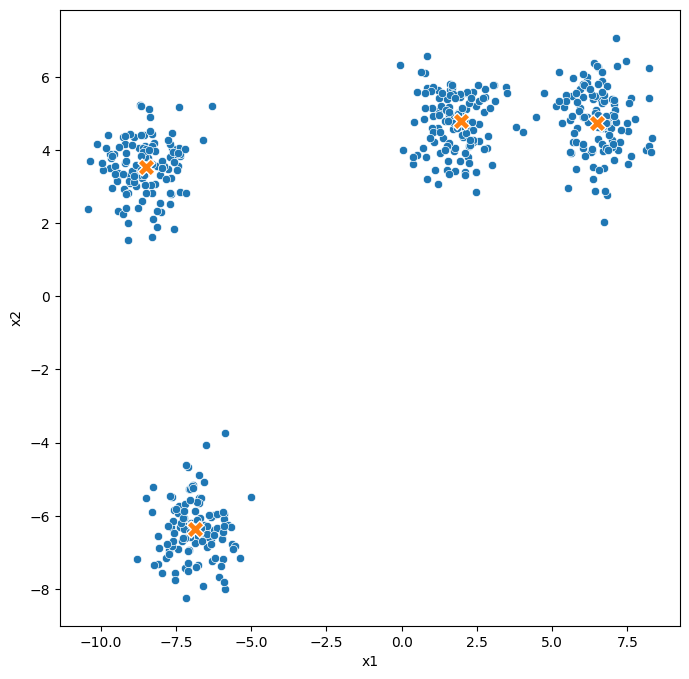

In [25]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2')
sns.scatterplot(data=df_centers, x='x1',y='x2',s=150,marker='X')
plt.show()


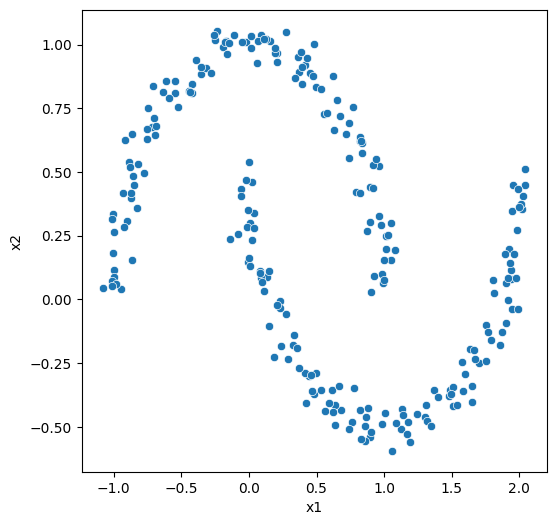

In [26]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=df_moons, x='x1',y='x2')
plt.show()

## Implementando DBSCAN

In [27]:
dbscan_moons = DBSCAN(eps=0.3,min_samples=3)
y_m_predict = dbscan_moons.fit_predict(X_m)
df_moons['cluster'] = y_m_predict


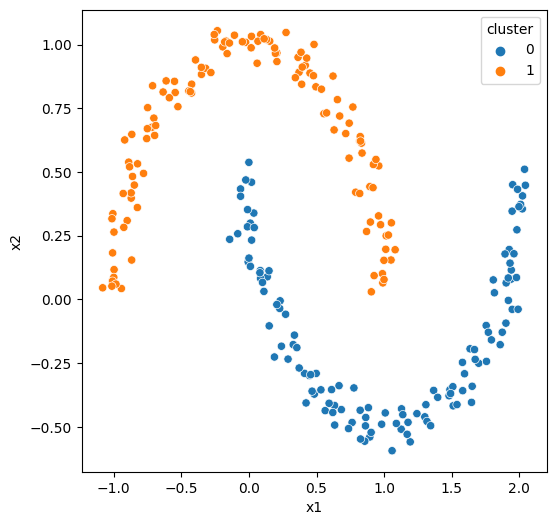

In [28]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=df_moons, x='x1',y='x2',hue='cluster')
plt.show()

In [29]:
dbscan_blobs = DBSCAN(eps=0.9,min_samples=4)
y_predict = dbscan_blobs.fit_predict(X)
df_blobs['cluster'] = y_predict

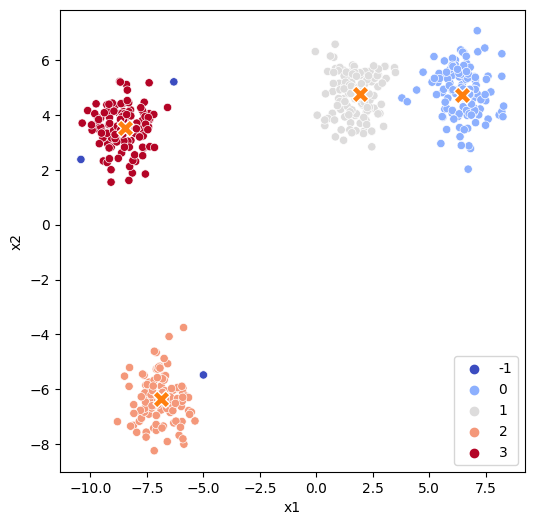

In [30]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=df_blobs, x='x1',y='x2',hue='cluster',palette='coolwarm')
sns.scatterplot(data=df_centers, x='x1',y='x2',s=150,marker='X')
plt.show()

Recordar que $(-1)$ en DBSCAN se refiere al noise (ruido)

## Hyperparameters

In [31]:
from sklearn.neighbors import NearestNeighbors

El numero de neighbors se toma de forma empirica al saber el numero de dimensiones del dataset y multiplicarlo por dos

In [32]:
neighbors = NearestNeighbors(n_neighbors=3) 
neighbors_fit= neighbors.fit(X)
distances, index = neighbors_fit.kneighbors(X)

In [33]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Grafico de rodilla

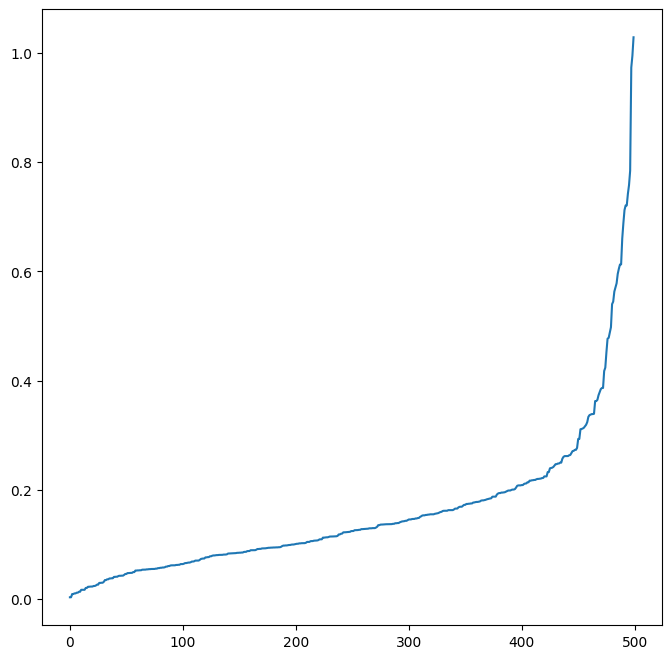

In [34]:
fig = plt.figure(figsize=(8,8))
plt.plot(distances)
plt.show()

In [35]:
eps_values = np.arange(0.25,0.8,0.10)
min_samples_values= np.arange(2,10)

In [36]:
from itertools import product

In [37]:
dbscan_params = list(product(eps_values,min_samples_values))
sil_scores = []

for p in dbscan_params:
    y_pred = DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X,y_pred))

In [38]:
df_params_tunning = pd.DataFrame.from_records(
    dbscan_params,
    columns = ['Eps','Min_samples']
)
df_params_tunning['sil_scores'] = sil_scores
df_params_tunning

,Eps,Min_samples,sil_scores
0,0.25,2,-0.018230
1,0.25,3,-0.078292
2,0.25,4,-0.148609
3,0.25,5,-0.250890
4,0.25,6,-0.316981
5,0.25,7,-0.356558
6,0.25,8,-0.439722
7,0.25,9,-0.536879
8,0.35,2,0.030908
9,0.35,3,0.155744


In [39]:
pivot_data =pd.pivot_table(data=df_params_tunning, values= 'sil_scores',index='Min_samples',columns='Eps')

<Axes: xlabel='Eps', ylabel='Min_samples'>

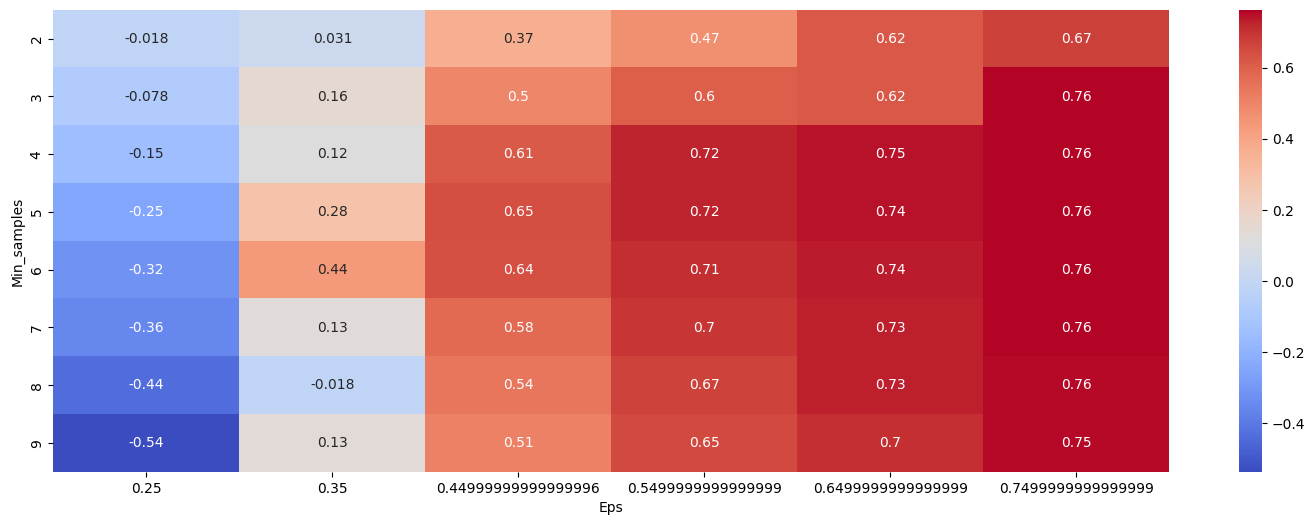

In [40]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(data=pivot_data,annot=True,annot_kws={'size':10},cmap='coolwarm',ax=ax)

## Evaluación de DBSCAN

In [44]:
dbscan_hyper_cluster = DBSCAN(eps=0.749,min_samples=3)
y_hyper_predict = dbscan_hyper_cluster.fit_predict(X)
df_blobs['hyperparameterized cluster'] = y_hyper_predict

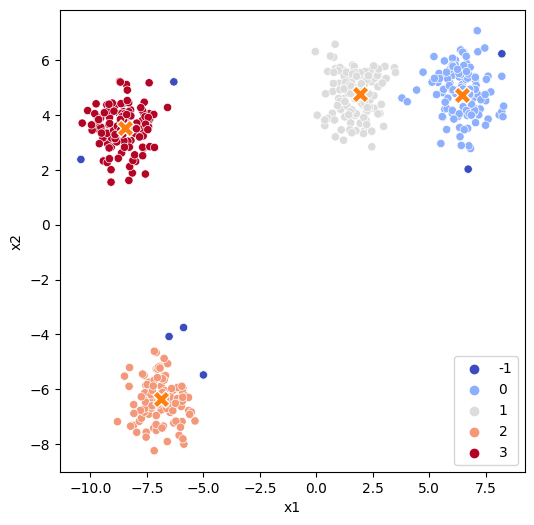

In [45]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(data=df_blobs, x='x1',y='x2',hue='hyperparameterized cluster',palette='coolwarm')
sns.scatterplot(data=df_centers, x='x1',y='x2',s=150,marker='X')
plt.show()

For n_clusters = 5 The average silhouette_score is : 0.7602725155173199


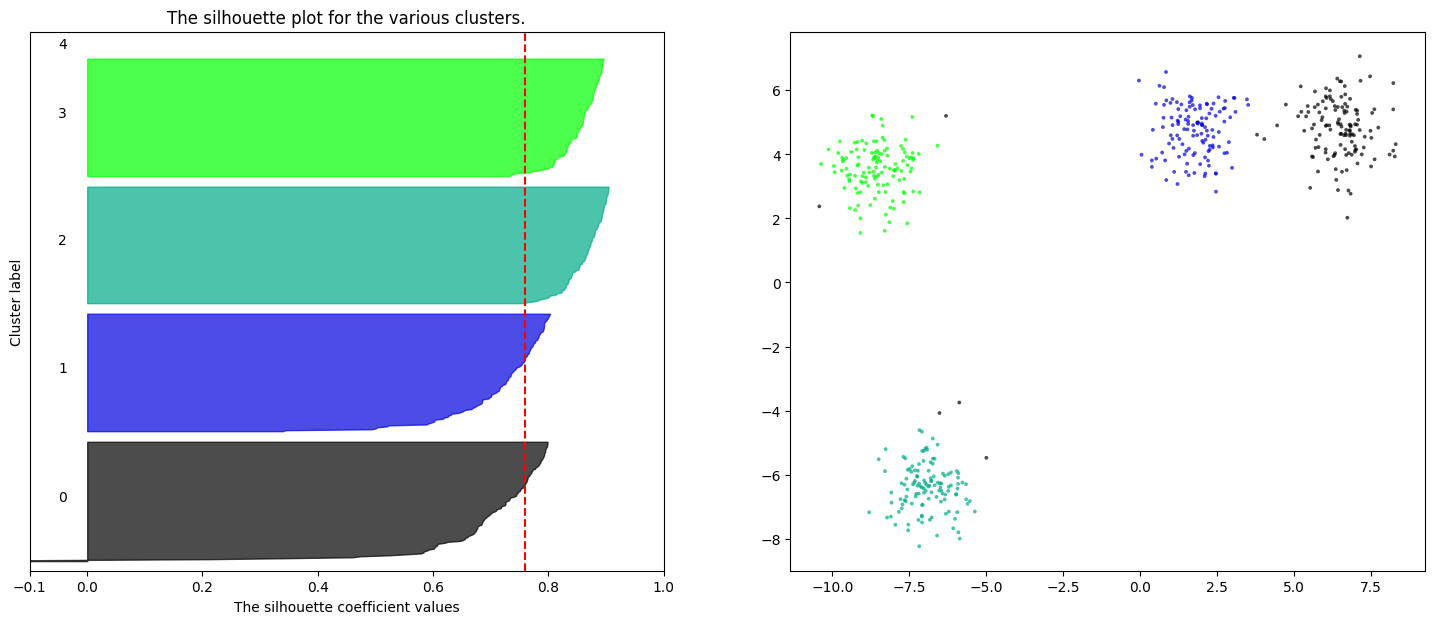

In [48]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.749,min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

        
plt.show()